In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

# Chargement du MNIST

In [3]:
(X_train, y_train ) , (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
X_train = X_train/255
X_train = X_train.reshape(-1,28,28,1)*2. -1.

In [5]:
X_train.min()

-1.0

In [6]:
X_train.max()

1.0

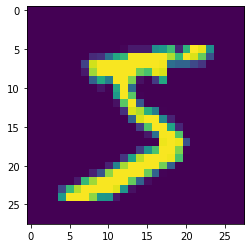

In [ ]:
plt.imshow(X_train[0])

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

# On ne selectionne que les 0

In [ ]:
only_zeros = X_train[y_train==0]

In [ ]:
only_zeros.shape

(5923, 28, 28)

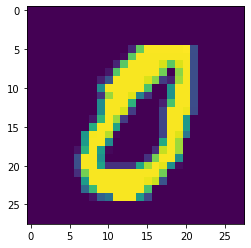

In [ ]:
plt.imshow(only_zeros[10])

# Creation du discriminateur

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Reshape, Flatten
from tensorflow.keras.models import Sequential

In [ ]:
discriminator = Sequential()
discriminator.add(Flatten(input_shape=[28,28]))
discriminator.add(Dense(150, activation='relu'))
discriminator.add(Dense(100, activation='relu'))
discriminator.add(Dense(1, activation= 'sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer='adam')

# Creation du générateur

In [ ]:
#784 --> 150 --> 100 --> 150 --> 784
coding_size = 100

generator= Sequential()
generator.add(Dense(100, activation = 'relu', input_shape=[coding_size]))
generator.add(Dense(150, activation='relu'))
generator.add(Dense(784, activation='relu'))
generator.add(Reshape([28,28]))

In [ ]:
GAN = Sequential([generator, discriminator])

In [ ]:
GAN.compile(loss="binary_crossentropy", optimizer="adam")

In [ ]:
discriminator.trainable = False

# Creation des batches

In [ ]:
batch_size = 32

In [ ]:
my_data = only_zeros

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size=1000)

In [ ]:
type(dataset)

tensorflow.python.data.ops.dataset_ops.ShuffleDataset

In [ ]:
dataset

<ShuffleDataset shapes: (28, 28), types: tf.uint8>

In [ ]:
dataset = dataset.batch(batch_size, drop_remainder = True).prefetch(1)

In [ ]:
epochs=1

In [ ]:
GAN.layers[0].summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_16 (Dense)             (None, 150)               15150     
_________________________________________________________________
dense_17 (Dense)             (None, 784)               118384    
_________________________________________________________________
reshape_2 (Reshape)          (None, 28, 28)            0         
Total params: 143,634
Trainable params: 143,634
Non-trainable params: 0
_________________________________________________________________


In [ ]:
GAN.layers[1].summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 150)               117750    
_________________________________________________________________
dense_13 (Dense)             (None, 100)               15100     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 101       
Total params: 132,951
Trainable params: 0
Non-trainable params: 132,951
_________________________________________________________________


In [ ]:
[0.0]*10

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [ ]:
generator, discriminator = GAN.layers

for epochs in range(epochs):
  print(f"Actuellement a l epoch{epochs + 1}")
  i=0

  for X_batch in dataset:
    i=i+1
    if i%100 == 0:
      print(f"\Actuellement au batch numéro {i} de longueur {len(my_data)//batch_size}")

    # phase entrainnement du discriminateur
    noise = tf.random.normal(shape = [batch_size,coding_size])

    gen_images = generator(noise)

    X_fake_vs_real = tf.concat([gen_images, tf.dtypes.cast(X_batch,tf.float32)], axis=0)

    y1 = tf.constant([[0.0]]*batch_size+[[1.0]]*batch_size)
    discriminator.trainable= True

    discriminator.train_on_batch(X_fake_vs_real,y1)

    #phase entrainement générator

    noise = tf.random.normal(shape = [batch_size, coding_size])

    y2 = tf.constant([[1.0]]*batch_size)
    discriminator.trainable = False

    GAN.train_on_batch(noise,y2)



Actuellement a l epoch1
\Actuellement au batch numéro 100 de longueur 185


In [ ]:
noise = tf.random.normal(shape=[10,coding_size])

In [ ]:
noise.shape

TensorShape([10, 100])

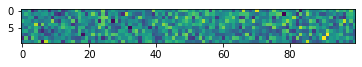

In [ ]:
plt.imshow(noise)

In [ ]:
images = generator(noise)

In [ ]:
images.shape

TensorShape([10, 28, 28])

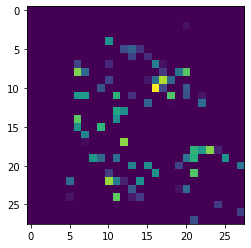

In [ ]:
plt.imshow(images[9])